In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics 

In [5]:
pyber_ride_df = pd.read_csv('Resources/PyBer_ride_data.csv')
pyber_ride_df.head()

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34


<AxesSubplot:xlabel='Month'>

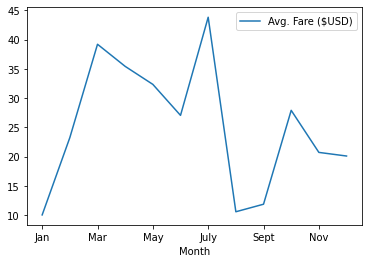

In [7]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")

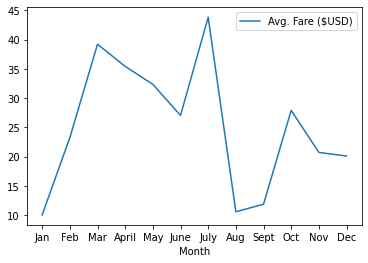

In [10]:
#We can adjust the x-ticks to show all the months by editing our code to look like this:

# Set x-axis and tick locations.
x_axis = np.arange(len(pyber_ride_df))
tick_locations = [value for value in x_axis]
# Plot the data.
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")
plt.xticks(tick_locations, pyber_ride_df["Month"])
plt.show()

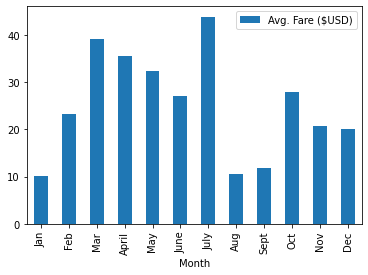

In [11]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)", kind='bar')
plt.show()

## skill drill

Using the data from the PyBer ride DataFrame, create a bar chart with the following annotations and characteristics:

    Add error bars.
    Add caps to the error bars.
    Change the color of the bars to sky blue.
    Rotate the labels on the x-axis to horizontal.
    Set the y-axis increment to every $5.

Your chart should look similar to this:

In [20]:
stdev = statistics.stdev(pyber_ride_df['Avg. Fare ($USD)'])
stdev

11.208367917035753

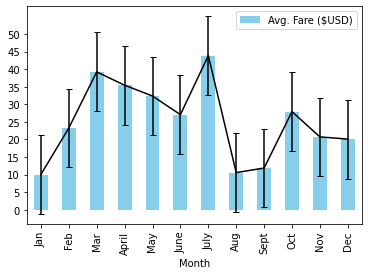

In [37]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)", kind='bar', color='skyblue')
plt.errorbar(pyber_ride_df['Month'], pyber_ride_df['Avg. Fare ($USD)'], capsize=3,yerr=stdev,color='black')
plt.yticks(np.arange(0, 51, step=5.0))
plt.show()

## 5.2.1 Import and Inspect CSV Files

In [62]:
 # Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

Inspect the Data

Before we do any analysis, we will inspect the data and answer the following questions:

    How many columns and rows are there?
    What types of data are present?
    Is the data readable or does it need to be converted in some way?

If you open the city_data.csv file, you will see three columns: city, driver_count, and type. Here's a snapshot of the first ten rows of data in this file:

The first 10 rows of the city_data CSV file



It would be foolish to start messing around with such a large dataset without knowing exactly what you're trying to get out of it. So you and Omar have a head-to-head to clarify the process and outcomes for this project. You come up with the following list of steps and deliverables:

    Import your data into a Pandas DataFrame.
    Merge your DataFrames.
    Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
    Determine the mean, median, and mode for the following:
        The total number of rides for each city type.
        The average fares for each city type.
        The total number of drivers for each city type.
    Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
        The number of rides for each city type.
        The fares for each city type.
        The number of drivers for each city type.
    Create a pie chart that visualizes each of the following data for each city type:
        The percent of total fares.
        The percent of total rides.
        The percent of total drivers.

Omar has approved the project scope. It's time to get to work!


In [63]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [64]:
ride_data_df.head()
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64



To get the name of each column and the number of rows that are not null, we can use the df.count() method.

Another option is to use df.isnull().sum() method chaining.

To get the data types of each column, we use the dtypes on the DataFrame.

In [65]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [66]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [67]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [70]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

Merge DataFrames

Before we merge the DataFrames, let's review each DataFrame.

The columns in the city_data_df DataFrame are:

    city
    driver_count
    type

The columns in the ride_data_df are:

    city
    date
    fare
    ride_id




rewind

When we merge two DataFrames, we merge on a column with the same data, and the same column name, in both DataFrames. We use the following syntax to do that:

new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

We may have to merge the DataFrames using the how= parameter either left, right, inner, or outer depending how we want to merge the DataFrames. The default is inner.


In [76]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


Omar has asked you to create a bubble chart that showcases the average fare versus the total number of rides with bubble si+ze based on the average number of drivers for each city type: urban, suburban, and rural.

For the bubble chart, we will need to plot the following:

    The average fare for each type of city on the y-axis
    The total number of rides for each type of city on the x-axis
    Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city


In [88]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [92]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


## 5.3.2 Get the Number of Rides for Each City Type

## 5.3.4 Get the Average Number of Drivers for Each City Type

In [98]:
y_axis_urban = urban_cities_df.groupby('city').mean()['fare']
x_axis_urban = urban_cities_df.groupby('city').count()['ride_id']
marker_urban = urban_cities_df.groupby('city').mean()['driver_count']

y_axis_suburban = suburban_cities_df.groupby('city').mean()['fare']
x_axis_suburban = suburban_cities_df.groupby('city').count()['ride_id']
marker_suburban = suburban_cities_df.groupby('city').mean()['driver_count']

y_axis_rural = rural_cities_df.groupby('city').mean()['fare']
x_axis_rural = rural_cities_df.groupby('city').count()['ride_id']
marker_rural = rural_cities_df.groupby('city').mean()['driver_count']

## 5.3.5 Create Bubble Charts

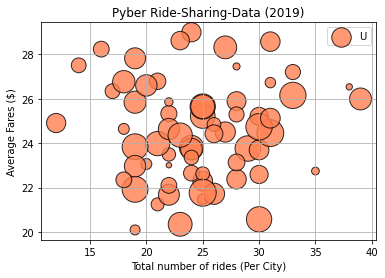

In [111]:
plt.scatter(x_axis_urban, y_axis_urban, s=marker_urban*10, 
            alpha=0.8, linewidths=1, edgecolor = 'black', 
            label='Urban', c='coral')
#plt.scatter(x_axis_suburban, y_axis_suburban, s=marker_suburban, alpha=0.5, edgecolor = 'black')
#plt.scatter(x_axis_rural, y_axis_rural, s=marker_rural, alpha=0.5, edgecolor = 'black')
plt.title('Pyber Ride-Sharing-Data (2019)')
plt.xlabel('Total number of rides (Per City)')
plt.ylabel('Average Fares ($)')
plt.grid(True)
# Add the legend.
plt.legend('Urban')

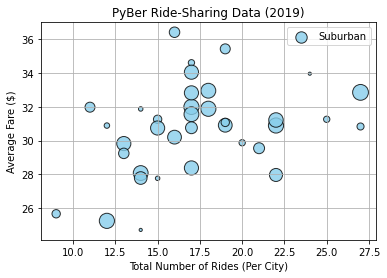

In [113]:
# Build the scatter plots for suburban cities.
plt.scatter(x_axis_suburban,
      y_axis_suburban,
      s=10*marker_suburban, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

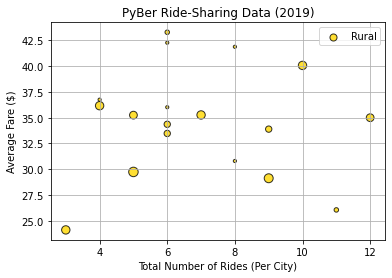

In [114]:
# Build the scatter plots for rural cities.
plt.scatter(x_axis_rural,
      y_axis_rural,
      s=10*marker_rural, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

Text(42, 35, 'Note: Circle size correlates with driver count per city.')

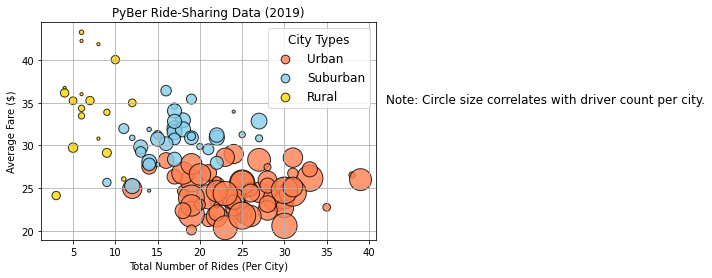

In [123]:
plt.scatter(x_axis_urban, y_axis_urban, s=marker_urban*10, 
            alpha=0.8, linewidths=1, edgecolor = 'black', 
            label='Urban', c='coral')
plt.scatter(x_axis_suburban,
      y_axis_suburban,
      s=10*marker_suburban, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.scatter(x_axis_rural,
      y_axis_rural,
      s=10*marker_rural, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

In [124]:
# Save the figure.
plt.savefig("analysis/Fig1.png")

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig1.png'

<Figure size 432x288 with 0 Axes>